In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

In [ ]:
# read data
for i in range(2003, 2006):
    if i == 2003:
        df = pd.read_csv(f'./data/{i}.csv')
    else:
        tmp = pd.read_csv(f'./data/{i}.csv')
        df = pd.concat([df, tmp], axis = 0)

## Data preprocessing
1. delay/total = 0.444

In [ ]:
# drop nan and trivial columns
rm_col = [
    'TailNum', 'CancellationCode', 'FlightNum', 
    'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
    'LateAircraftDelay'
]
df = df.drop(columns = rm_col)
df = df.dropna(axis = 0)

In [ ]:
# one hot encoding
encode_col = ['UniqueCarrier']

for target in encode_col:
    dummies = pd.get_dummies(df[target], prefix = target)
    df = pd.concat([df, dummies], axis = 1)
    
df = df.drop(columns = encode_col)

# label encoding
encode_col = ['Origin', 'Dest']

for target in encode_col:
    encode_lst = df[target].unique()
    
    map_dict = dict()
    for i, key in enumerate(encode_lst):
        map_dict[key] = i
        
    df[target] = df[target].map(map_dict)

    
# convert type
type_dict = {
    'DepTime': int,
    'ArrTime': int,
    'ActualElapsedTime': int,
    'CRSElapsedTime': int,
    'AirTime': int,
    'ArrTime': int,
    'ArrDelay': int,
    'DepDelay': int,
    'Year': int,
    'Origin': int,
    'Dest': int
}
df = df.astype(type_dict)

In [ ]:
# prepare label
df['Label'] = (df['ArrDelay'] > 0) | (df['DepDelay'] > 0)
df = df.drop(columns = ['ArrDelay', 'DepDelay'])
df = df.astype({'Label': int})

In [ ]:
# train test split
df.reset_index(drop = True)
train = df[df['Year'] < 2005]
test = df[df['Year'] == 2005]
df = df.drop(columns = ['Year'])
train = train.drop(columns = ['Year'])
test = test.drop(columns = ['Year'])

# convert to ndarray
y_train = np.asarray(train['Label'])
x_train = np.asarray(train.drop(columns = ['Label']))

y_test = np.asarray(test['Label'])
x_test = np.asarray(test.drop(columns = ['Label']))

In [ ]:
df.reset_index(drop = True)
df.to_csv('./data/fe.csv', index = False)

## Model training

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/fe.csv')

In [4]:
df.drop(columns = ['ArrTime', 'DepTime'], inplace = True)

In [5]:
train = df[df['Year'] < 2005]
test = df[df['Year'] == 2005]
df = df.drop(columns = ['Year'])
train = train.drop(columns = ['Year'])
test = test.drop(columns = ['Year'])

# convert to ndarray
y_train = np.asarray(train['Label'])
x_train = np.asarray(train.drop(columns = ['Label']))

y_test = np.asarray(test['Label'])
x_test = np.asarray(test.drop(columns = ['Label']))

In [6]:
# training
rf = RandomForestClassifier(n_jobs = 24)
#     n_estimators = 100,
#     max_depth = 8,
#     min_samples_split = 3,
#     max_features = 'sqrt',
#     n_jobs = 8,
#     class_weight = 'balanced',
#     max_samples = 0.7
# )

rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=24)

In [7]:
# evaluation
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74   3405027
           1       0.78      0.64      0.71   3587811

    accuracy                           0.72   6992838
   macro avg       0.73      0.73      0.72   6992838
weighted avg       0.73      0.72      0.72   6992838



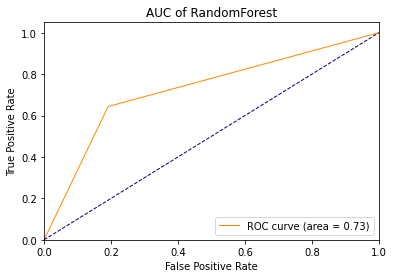

In [8]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 1
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label=f"ROC curve (area = {auc:0.2f})",
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC of RandomForest")
plt.legend(loc="lower right")
plt.show()